# **Importing libraries**

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the data
semiconductors=pd.read_csv('/content/chip_dataset (5).csv')

In [ ]:
semiconductors.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [ ]:
semiconductors.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [ ]:
semiconductors.shape

(4854, 14)

In [ ]:
semiconductors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

# **Getting the missing values**

In [4]:
#columns with missing values
missing_data=semiconductors.isnull().sum().sort_values(ascending=False)
missing_data

FP16 GFLOPS              4318
FP64 GFLOPS              3548
FP32 GFLOPS              2906
Die Size (mm^2)           715
Transistors (million)     711
TDP (W)                   626
Process Size (nm)           9
Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Freq (MHz)                  0
Foundry                     0
Vendor                      0
dtype: int64

In [5]:
#finding the perecentage of missing values in each column
missing_percentage=100*semiconductors.isnull().sum().sort_values(ascending=False)/len(semiconductors)
missing_percentage

FP16 GFLOPS              88.957561
FP64 GFLOPS              73.094355
FP32 GFLOPS              59.868150
Die Size (mm^2)          14.730119
Transistors (million)    14.647713
TDP (W)                  12.896580
Process Size (nm)         0.185414
Unnamed: 0                0.000000
Product                   0.000000
Type                      0.000000
Release Date              0.000000
Freq (MHz)                0.000000
Foundry                   0.000000
Vendor                    0.000000
dtype: float64

There are some columns that have more than 50% missing values, however we cannot drop this columns entirely becuase as we will see later we need them for EDA.

In [6]:
#getting numrical and categorical columns.
categorical_cols=semiconductors.select_dtypes(include='object').columns
numerical_cols=semiconductors.select_dtypes(include='float').columns


In [7]:
#we can fill the categorical columns with mode
semiconductors[categorical_cols]=semiconductors[categorical_cols].fillna(semiconductors[categorical_cols].mode())

In [8]:
#we can fill the numerical columns with the median
semiconductors[numerical_cols]=semiconductors[numerical_cols].fillna(semiconductors[numerical_cols].median())

In [9]:
semiconductors.isnull().sum()

Unnamed: 0               0
Product                  0
Type                     0
Release Date             0
Process Size (nm)        0
TDP (W)                  0
Die Size (mm^2)          0
Transistors (million)    0
Freq (MHz)               0
Foundry                  0
Vendor                   0
FP16 GFLOPS              0
FP32 GFLOPS              0
FP64 GFLOPS              0
dtype: int64

In [10]:
#dropping irrelevant columns that will not be used in the EDa
semiconductors.drop(columns=['Unnamed: 0','Product'], inplace=True)

# **Transform temporal data to their corrrect format (date time)**

In [11]:
semiconductors['Release Date']=pd.to_datetime(semiconductors['Release Date'])

In [ ]:
semiconductors.dtypes

Type                             object
Release Date             datetime64[ns]
Process Size (nm)               float64
TDP (W)                         float64
Die Size (mm^2)                 float64
Transistors (million)           float64
Freq (MHz)                      float64
Foundry                          object
Vendor                           object
FP16 GFLOPS                     float64
FP32 GFLOPS                     float64
FP64 GFLOPS                     float64
dtype: object

# **Moore's Law still holds, especially in GPUs.**

Moore's law is the observation that the number of transistors in an integrated circuit (IC) doubles about every two years.the principle that the speed and capability of computers can be expected to double every two years, as a result of increases in the number of transistors a microchip can contain:
"even if Moore's Law fails in the future, new methods of computing may again set the industry on breakneck development speeds"

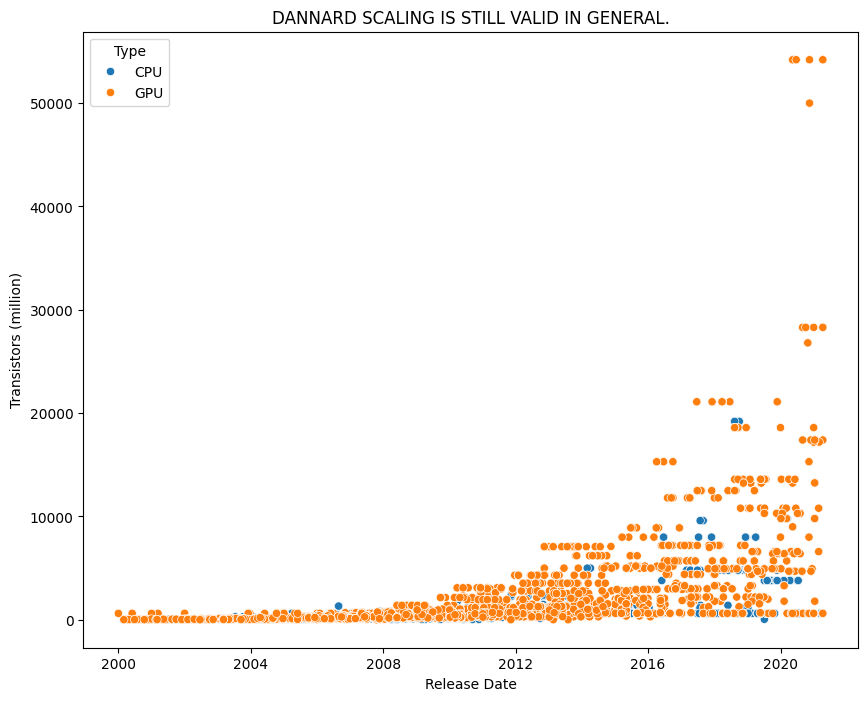

In [12]:
#scatter plot comparing the release date with the number of transistors
plt.figure(figsize=(10,8))
sns.scatterplot(data=semiconductors, x='Release Date', hue='Type', y='Transistors (million)')
plt.title('Dannard Scaling is still valid in general.'.upper())
plt.show()

# **Dannard Scaling is still valid in general.**

In semiconductor electronics, Dennard scaling, also known as MOSFET scaling, is a scaling law which states roughly that, as transistors get smaller, their power density stays constant, so that the power use stays in proportion with area; both voltage and current scale (downward) with length.[

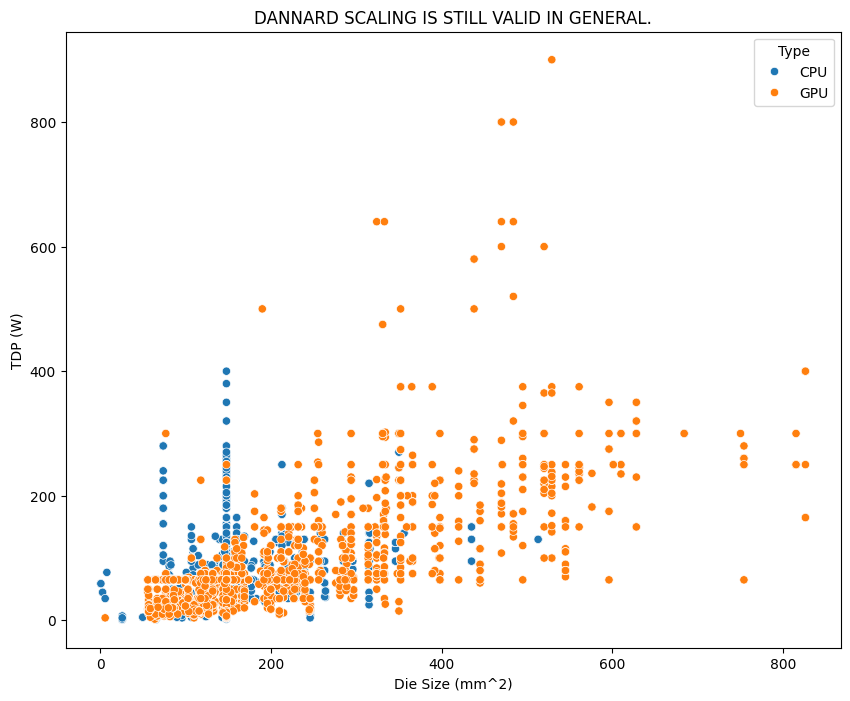

In [17]:

#
plt.figure(figsize=(10,8))
sns.scatterplot(data=semiconductors, x='Die Size (mm^2)', y='TDP (W)', hue='Type')
plt.title('Dannard Scaling is still valid in general.'.upper())
plt.show()

# **CPUs have higher frequencies, but GPUs are catching up.**

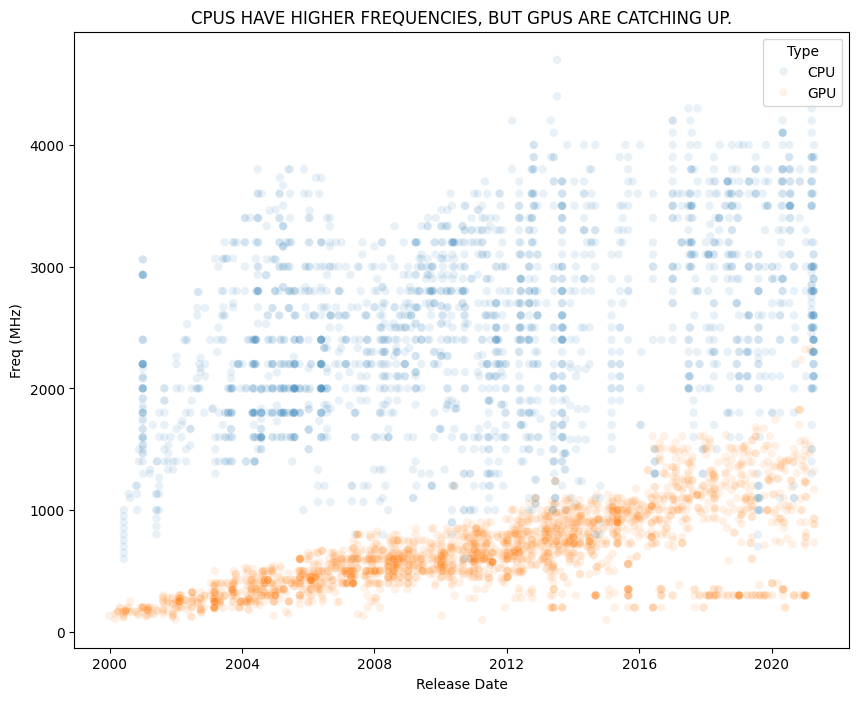

In [16]:
#scatter plot comparing the release date with the frequency
plt.figure(figsize=(10,8))
sns.scatterplot(data=semiconductors, x='Release Date', y='Freq (MHz)', hue='Type', alpha=0.1)
plt.title('CPUs have higher frequencies, but GPUs are catching up.'.upper())
plt.show()

From the observation above we can that the CPUs(blue dots), have a higher frequency as compared to the GPU(orange dots), but over the years the GPUs have been catching up.

# **GPU performance doubles every 1.5 years.**

In [14]:
#getting rows that only have the GPUs
gpu_chips=semiconductors[semiconductors['Type']=='GPU']

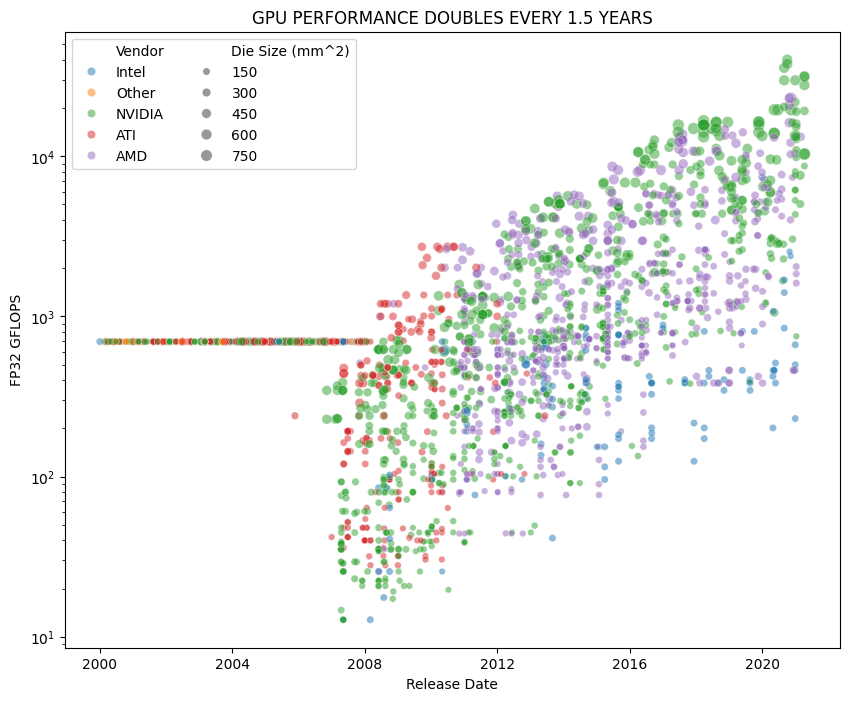

In [15]:
#scatterplot to plot the trend of gpus by vendors over the years
plt.figure(figsize=(10,8))
sns.scatterplot(data=gpu_chips, x='Release Date', y='FP32 GFLOPS', hue='Vendor', size='Die Size (mm^2)', alpha=0.5)
plt.title('gpu performance doubles every 1.5 years'.upper())
plt.yscale('log')
plt.legend(loc=2, ncols=2)
plt.show()

From the above observation we can se that the GPU trend is upward, and it is increasing linearly.

# **GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.**

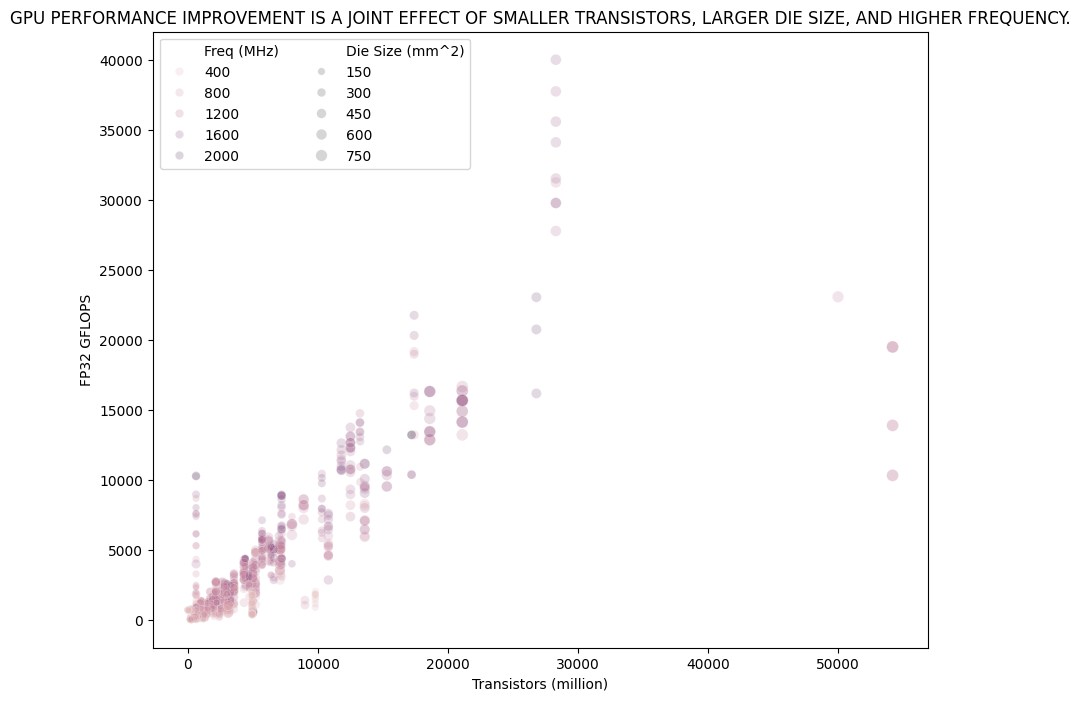

In [19]:
#Scatterplot comparing smaller transistors with the die size
plt.figure(figsize=(10,8))
sns.scatterplot(data=gpu_chips, y='FP32 GFLOPS', x='Transistors (million)', hue='Freq (MHz)', size='Die Size (mm^2)', alpha=0.2)
plt.title('GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.'.upper())
plt.legend(loc=2, ncols=2)
sns.set_palette('viridis',n_colors=5)
plt.show()

## High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

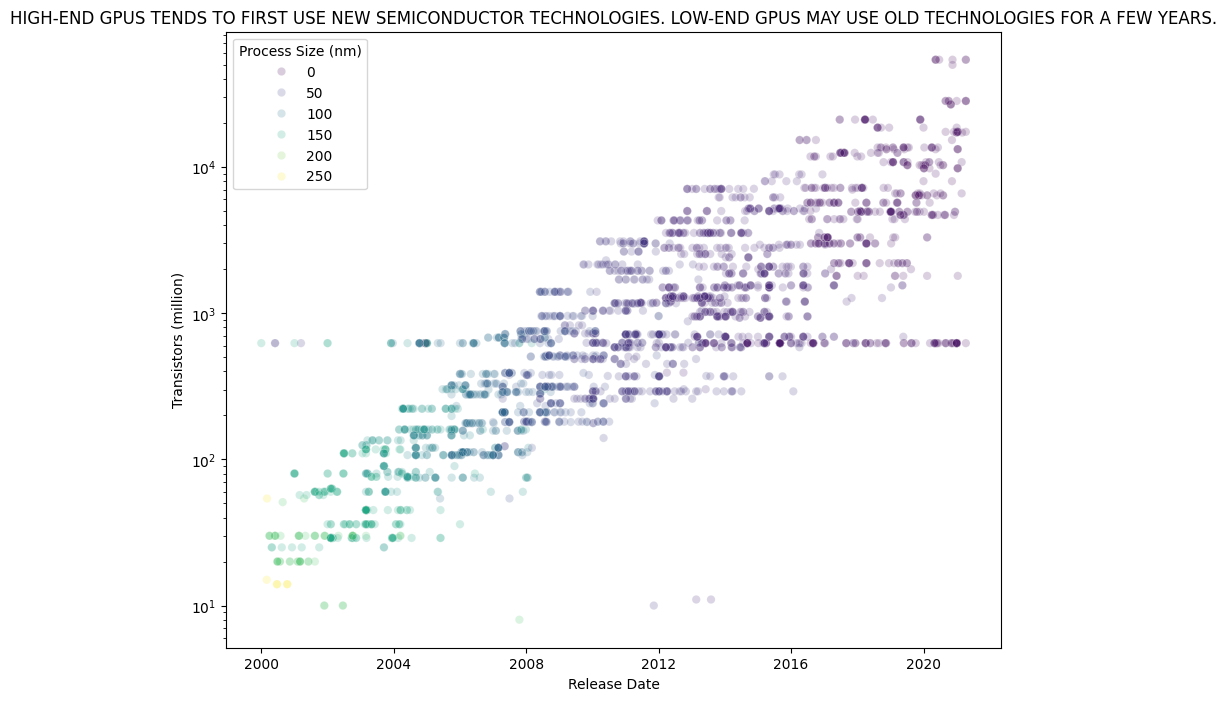

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=gpu_chips, x='Release Date', hue='Process Size (nm)', y='Transistors (million)', alpha=0.2, palette='viridis')
plt.title('High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.'.upper())
plt.yscale('log')
plt.show()

# **Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors**

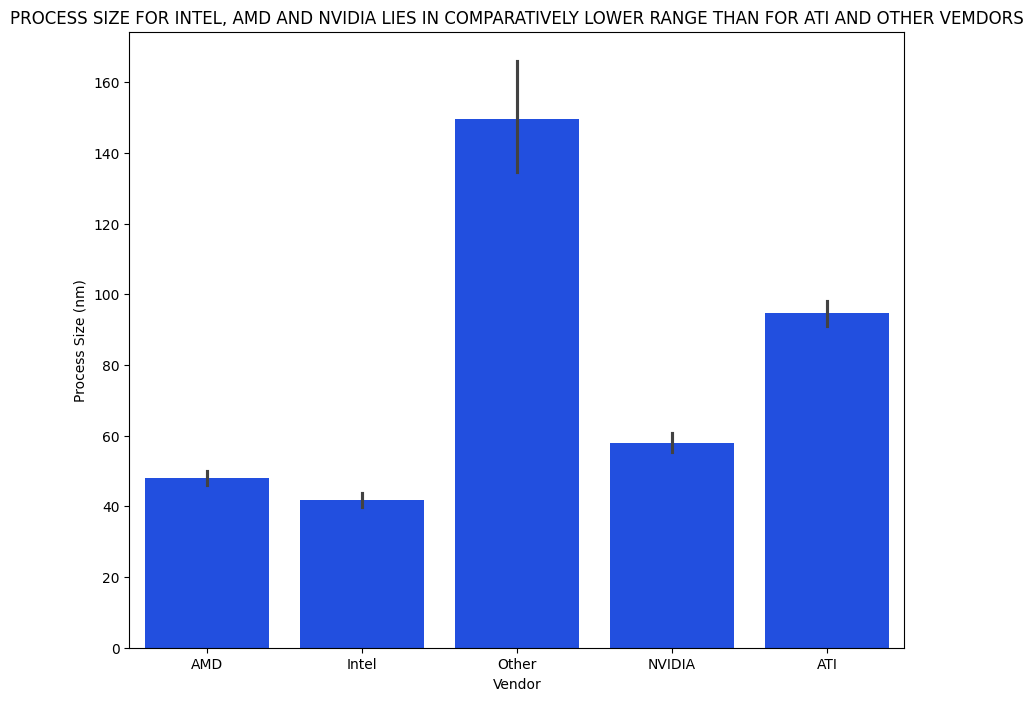

In [ ]:
#barplot to compare the diffrent process size from diffrent vendors
plt.figure(figsize=(10,8))
sns.barplot(data=semiconductors, x='Vendor', y='Process Size (nm)')
plt.title('Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors'.upper())
plt.show()

# **TSMC makes the highest number of chips in the world**

In [21]:
#the number of transistors made by each foundry
semiconductors['Foundry'].value_counts()
vendor_nums=semiconductors.groupby('Foundry')['Transistors (million)'].sum().sort_values(ascending=False)

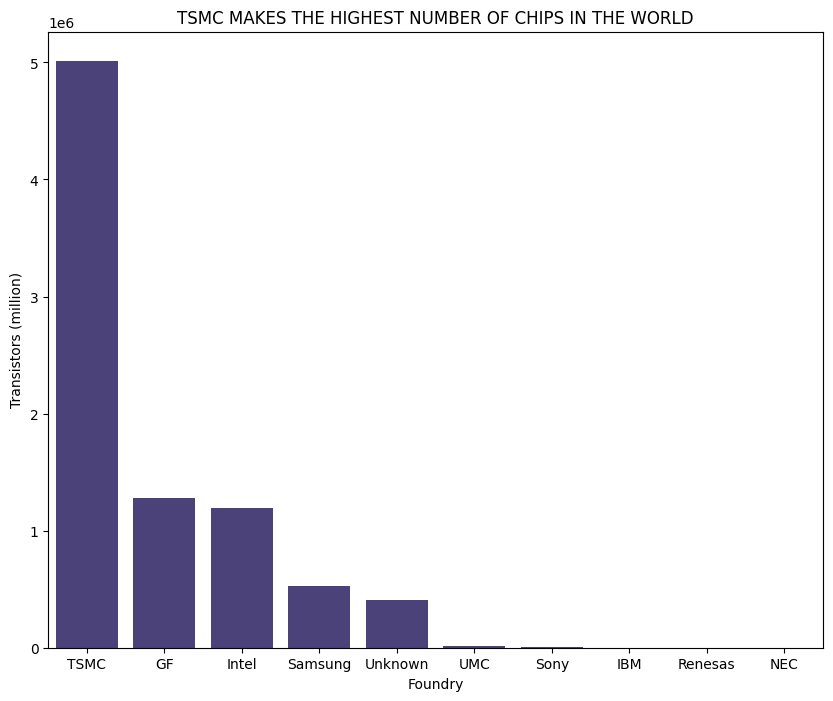

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(data=vendor_nums)
plt.title('TSMC makes the highest number of chips in the world'.upper())
plt.show()

# **Calculate and visualized the correlation among the features**

In [23]:
#viewing the correlation between all the numerical features
numerical_columns=semiconductors.select_dtypes(include='float').columns
corr_df=semiconductors[numerical_columns].corr()
corr_df

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
Process Size (nm),1.000000,-0.163978,-0.194722,-0.347757,-0.279588,-0.125513,-0.222708,-0.110493
TDP (W),-0.163978,1.000000,0.615420,0.458520,0.117569,0.318335,0.450016,0.329483
Die Size (mm^2),-0.194722,0.615420,1.000000,0.636466,-0.016186,0.464748,0.598618,0.478861
Transistors (million),-0.347757,0.458520,0.636466,1.000000,-0.013128,0.741419,0.815754,0.647538
Freq (MHz),-0.279588,0.117569,-0.016186,-0.013128,1.000000,-0.021884,-0.046621,-0.040985
FP16 GFLOPS,-0.125513,0.318335,0.464748,0.741419,-0.021884,1.000000,0.731935,0.694642
FP32 GFLOPS,-0.222708,0.450016,0.598618,0.815754,-0.046621,0.731935,1.000000,0.544067
FP64 GFLOPS,-0.110493,0.329483,0.478861,0.647538,-0.040985,0.694642,0.544067,1.000000


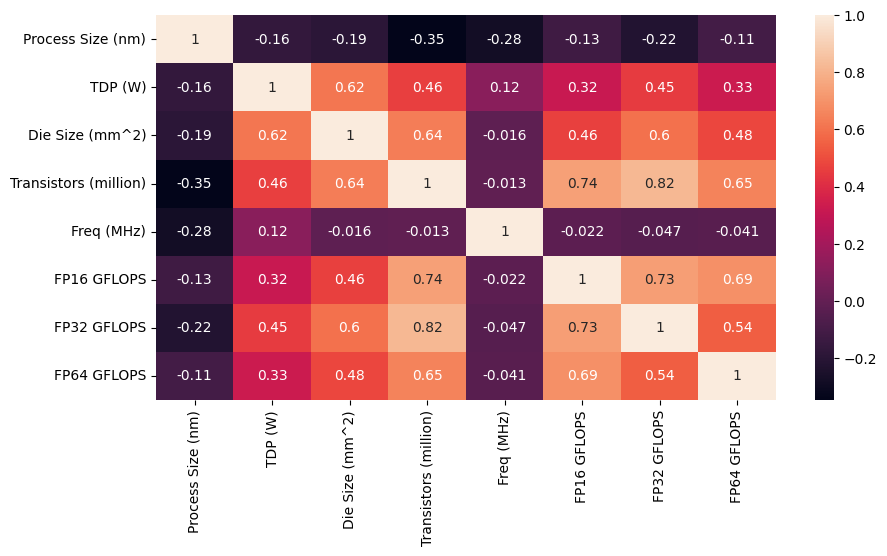

In [24]:
#correlation heatmap
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(corr_df, annot=True)
plt.show()

# Perfom the correct encoding for your data, in readiness for modelling.

semiconductors['Foundry'].value_counts()

In [26]:
#Extract categorical colums excluding those that were dropped
categorical_columns=semiconductors.select_dtypes(include='object').columns.tolist()


In [28]:
#importing one hot encoder
from sklearn.preprocessing import OneHotEncoder
#initializing OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(semiconductors[categorical_columns])
one_hot_df=pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
semiconductors_encoded=pd.concat([semiconductors,one_hot_df], axis=1)
semiconductors_encoded=semiconductors_encoded.drop(categorical_columns, axis=1)
semiconductors_encoded


,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,Type_CPU,...,Foundry_Samsung,Foundry_Sony,Foundry_TSMC,Foundry_UMC,Foundry_Unknown,Vendor_AMD,Vendor_ATI,Vendor_Intel,Vendor_NVIDIA,Vendor_Other
0,2007-02-20,65.0,45.0,77.0,122.0,2200.0,2965.5,696.0,89.28,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,2965.5,696.0,89.28,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2020-09-02,10.0,28.0,148.0,624.0,2600.0,2965.5,696.0,89.28,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,2965.5,696.0,89.28,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2011-05-03,45.0,125.0,258.0,758.0,3700.0,2965.5,696.0,89.28,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,2011-02-22,40.0,75.0,332.0,1950.0,450.0,2965.5,432.0,36.00,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4850,2005-06-01,90.0,7.0,148.0,624.0,250.0,2965.5,696.0,89.28,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4851,2010-03-03,40.0,23.0,100.0,486.0,500.0,2965.5,52.8,89.28,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4852,2003-03-06,150.0,65.0,65.0,29.0,250.0,2965.5,696.0,89.28,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
